In [3]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('../')
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from src.utils.visualize import plot_voronoi
from scipy.spatial import Voronoi, voronoi_plot_2d
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
PATH = train_set = r"../data/Ki67/SHIDC-B-Ki-67/Train/p10_0031_5"
JSON_EXT = ".json"
JPG_EXT = ".jpg"
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 120

In [5]:
json_df = pd.read_json(PATH+JSON_EXT)

In [6]:
def show_img(path,json_df):
    img = mpimg.imread(path)
    color = {
        1:"brown",
        2:"blue",
        3:"green"
    }
    
    for idx , row in json_df.iterrows():
        x = row[0]
        y = row[1]
        label = row[2]
        plt.plot(x, y, marker='o', color=color[label])
    plt.imshow(img)
    filename = path.split("/")[-1].split(".")[0]+"_notated"
    print(filename)
    plt.savefig(filename)
    pass

p10_0031_5_notated


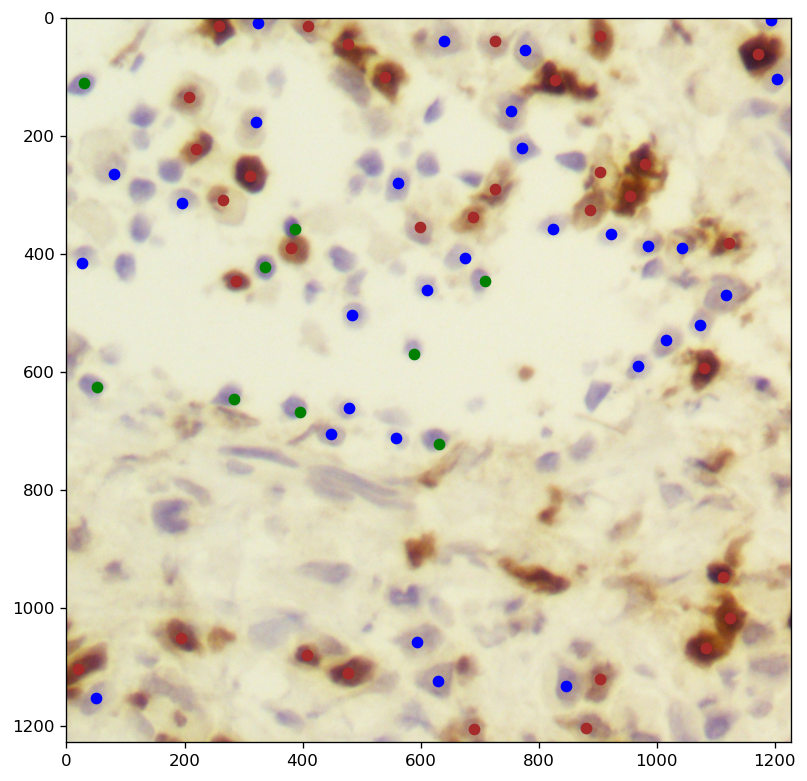

In [7]:
show_img(PATH+JPG_EXT,json_df,)

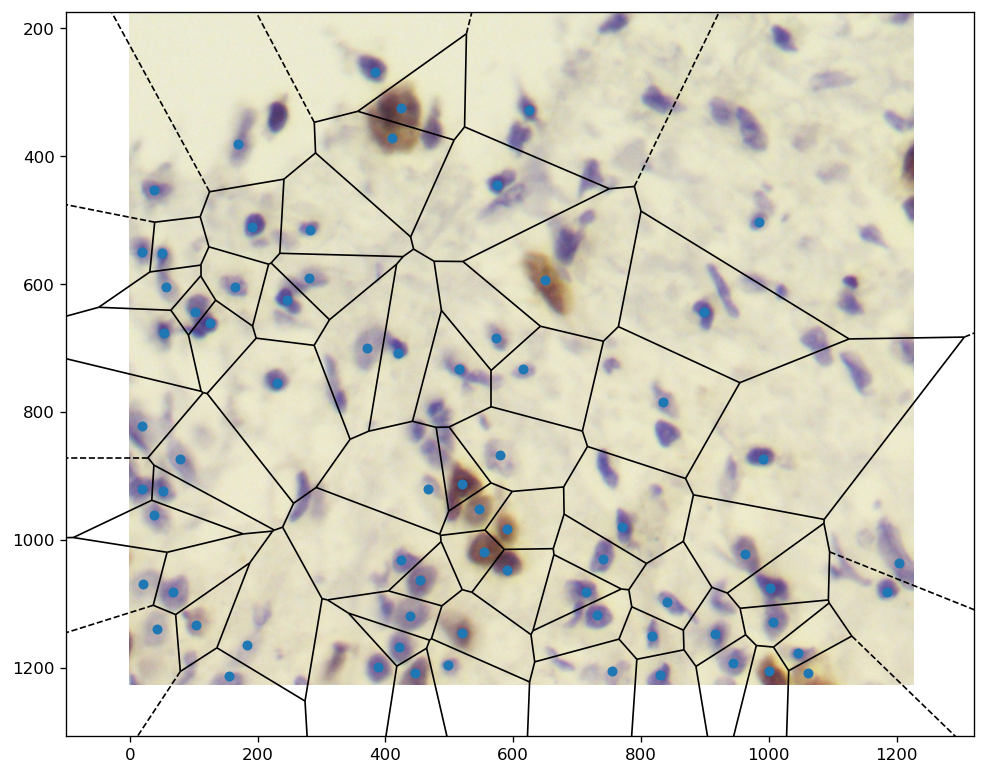

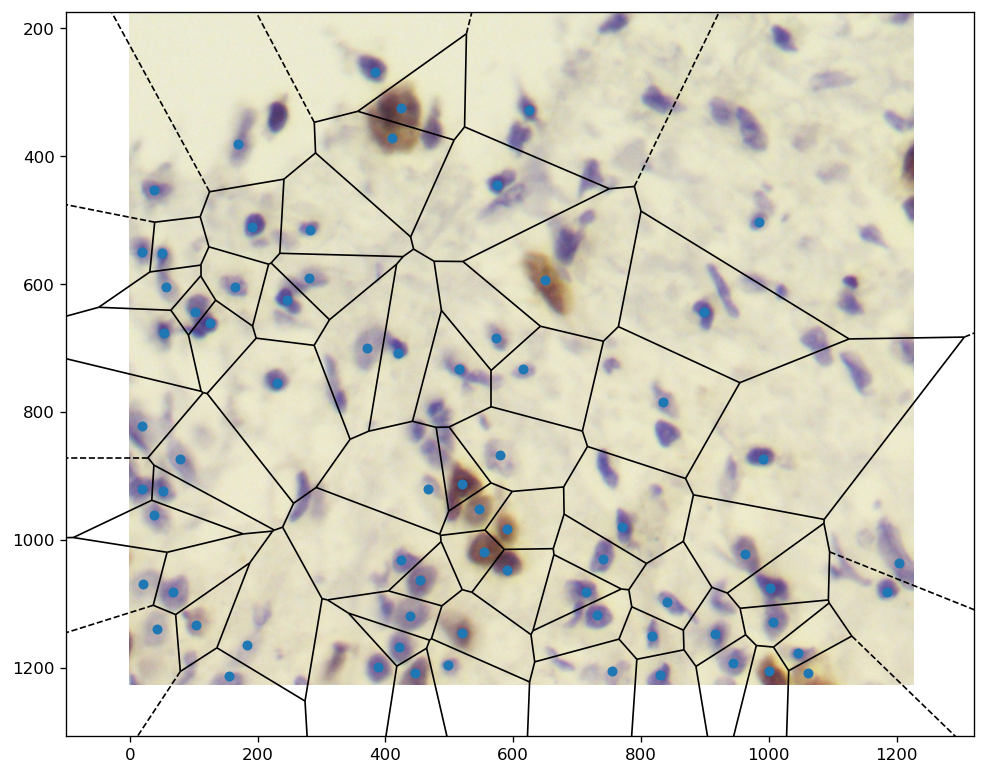

In [126]:
keys = list(zip(json_df.x,json_df.y))
path = PATH+JPG_EXT
img_arr = plt.imread(path)
filename = path.split("/")[-1].split(".")[0]+"_voronoi"
vor = Voronoi(keys)
plot_voronoi(vor,img_arr,show_points=True,show_verticles=False,line_width=1,points_size=10,save_as_file=True,filename=filename)